In [1]:
from settings import *
from q_channel_approx.physics_defns import create_hamiltonian

random_rho0s: setting seed=91195


In [2]:
H = create_hamiltonian(system), 0.05

In [3]:
qubits = TriangularLayoutAB(m=m, cutoff=1, distance=0.9)
operations = [("ham fix t", H), ("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

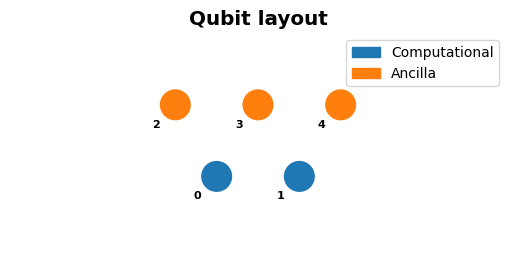

In [4]:
qubits.show_layout()

In [5]:
theta_opt = np.load("losses_theta_opt.npy")

In [6]:
theta_opt, errors, thetas = optimize(circuit, training_data_short, max_count=200, n_grad=10, theta_init=theta_opt)

np.save("losses_theta_opt", theta_opt)
np.save("losses_thetas", thetas)
np.save("losses_errors", errors)

optimizer (optimization indices): setting seed=52379


C:\Users\Admin\Desktop\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 0 
            Max gradient term: 0.0003213208146873013 
            Current gradient: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.93091913e-06  1.94091770e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.25596957e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  2.78910338e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -4.10889550e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000

In [7]:
theta_opt = np.load("losses_theta_opt.npy")
thetas = np.load("losses_thetas.npy")
errors = np.load("losses_errors.npy")

In [8]:
theta_opt

array([-0.23304167,  0.07925682,  0.1       ,  0.1       ,  0.1       ,
        0.08561086,  0.14561271,  0.09961281,  0.32109495,  0.10651969,
       -0.19286753, -0.05059558,  0.09996372,  0.10020821,  0.10021057,
       -0.10218559,  0.12475839,  0.06997338,  0.10039477,  0.10144347,
        0.09971667,  0.03547586,  0.24372501,  0.09677132,  0.17724531,
        0.10592565,  0.08459292,  0.20991145,  0.10022964,  0.10113818,
        0.09518405,  0.06018628,  0.10363447, -0.18543909,  0.08882811,
        0.07001992,  0.10050563,  0.01264077, -0.48528716,  0.0866306 ,
        0.10783985,  0.10648745, -0.07034494, -0.01878132,  0.1024585 ,
        0.10283854,  0.09625467,  0.12492023, -0.1157342 , -0.08024499,
        0.10020363,  0.10743531,  0.10158956,  0.08392861,  0.15646218,
        0.08397108,  0.65128161,  0.13862389,  0.10084527,  0.05378725,
        0.09868821,  0.09272967,  0.0996208 ,  0.32529641,  0.10991866,
       -0.10746261,  0.09824438,  0.108083  ,  0.1017305 ,  0.04

rho_rand_haar: seed=16979


c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Admin\Desktop\BFP\quantum-channel-approximation\venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<Axes: title={'center': 'ref: dashed line, approx: solid line'}, xlabel='time', ylabel='population'>

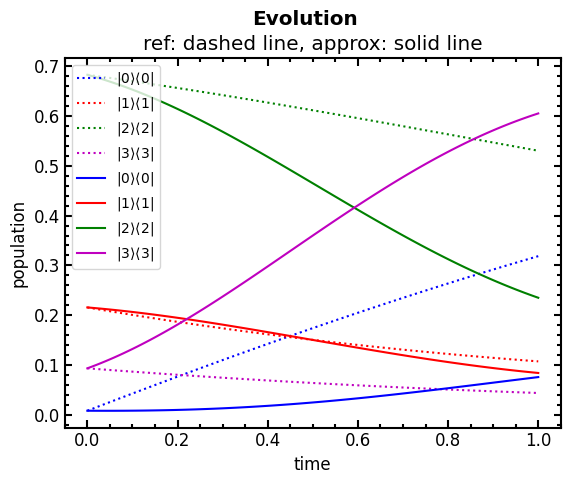

In [9]:
rho0 = rho_rand_haar(m)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(100, rho0.full())

Os = [O.full() for O in create_observables_comp_basis(m)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.01, N=100, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(m))

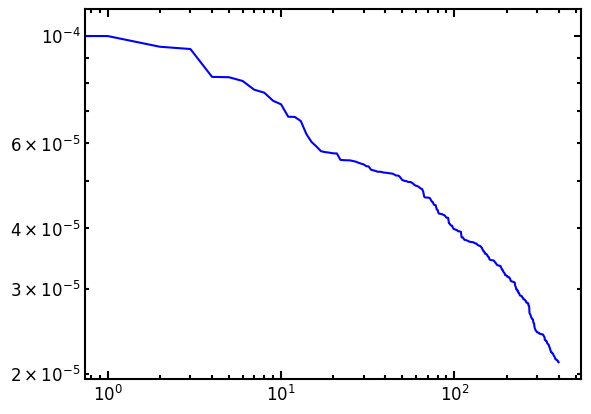

In [10]:
plt.loglog(errors)